In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.sample(10)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
430,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,0
309,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,0
540,829,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,NaN,0
126,1105,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,NaN,0
831,1064,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S,9,1
439,1252,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S,NaN,0
373,24,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,1
909,121,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,5,1
124,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,1
605,511,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,0


In [5]:
test.sample(10)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
301,1240,3.0,"Thomas, Master. Assad Alexander",male,0.4167,0.0,1.0,2625,8.5167,NaN,C,16
171,113,1.0,"Fortune, Miss. Mabel Helen",female,23.0000,3.0,2.0,19950,263.0000,C23 C25 C27,S,10
250,170,1.0,"Ismay, Mr. Joseph Bruce",male,49.0000,0.0,0.0,112058,0.0000,B52 B54 B56,S,C
228,265,1.0,"Sloper, Mr. William Thompson",male,28.0000,0.0,0.0,113788,35.5000,A6,S,7
316,820,3.0,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0000,0.0,2.0,363291,20.5250,NaN,S,C D
264,289,1.0,"Taussig, Miss. Ruth",female,18.0000,0.0,2.0,110413,79.6500,E68,S,8
178,997,3.0,"Masselmani, Mrs. Fatima",female,NaN,0.0,0.0,2649,7.2250,NaN,C,C
193,597,2.0,"Williams, Mr. Charles Eugene",male,NaN,0.0,0.0,244373,13.0000,NaN,S,14
389,919,3.0,"Katavelas, Mr. Vassilios (""Catavelas Vassilios"")",male,18.5000,0.0,0.0,2682,7.2292,NaN,C,NaN
304,471,2.0,"Kelly, Mrs. Florence ""Fannie""",female,45.0000,0.0,0.0,223596,13.5000,NaN,S,9


In [6]:
## cleaning, exploration and Pre-Processing of Training set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.1+ KB


In [7]:
print(f"Dimensions: {train.ndim} \nShape: {train.shape} \nSize: {train.size}")

Dimensions: 2 
Shape: (916, 13) 
Size: 11908


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
traveller_ID        393 non-null int64
ticket_class        393 non-null float64
name                393 non-null object
sex                 393 non-null object
age                 317 non-null float64
Siblings_spouses    393 non-null float64
Parchil             393 non-null float64
TickNum             393 non-null object
fare                393 non-null float64
cabin               91 non-null object
embarked            392 non-null object
MedBoat             159 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 36.9+ KB


In [9]:
print(f"Dimensions: {test.ndim} \nShape: {test.shape} \nSize: {test.size}")

Dimensions: 2 
Shape: (393, 12) 
Size: 4716


In [10]:
train.describe(include='all')

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
count,916.000000,916.000000,916,916,729.000000,916.000000,916.000000,916,915.000000,204,915,327,916.000000
unique,NaN,NaN,915,2,NaN,NaN,NaN,694,NaN,146,3,24,NaN
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,B57 B59 B63 B66,S,13,NaN
freq,NaN,NaN,2,592,NaN,NaN,NaN,9,NaN,5,638,30,NaN
mean,656.248908,2.305677,NaN,NaN,29.102309,0.539301,0.386463,NaN,33.709221,NaN,NaN,NaN,0.361354
std,381.176191,0.841811,NaN,NaN,13.866954,1.082188,0.893933,NaN,52.840656,NaN,NaN,NaN,0.480655
min,0.000000,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,328.250000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,NaN,0.000000
50%,670.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN,NaN,0.000000
75%,974.250000,3.000000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,1.000000


In [11]:
train.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


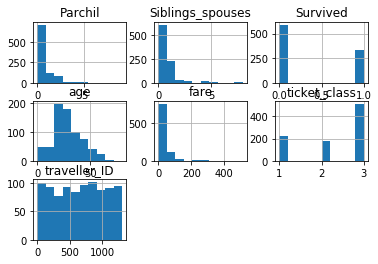

In [13]:
train.hist();

In [14]:
#Numeric Columns
num=train.select_dtypes(include=[np.number]).columns.values

In [15]:
num

array(['traveller_ID', 'ticket_class', 'age', 'Siblings_spouses',
       'Parchil', 'fare', 'Survived'], dtype=object)

In [16]:
#Non-Numeric Columns 
train.select_dtypes(exclude=[np.number]).columns.values

array(['name', 'sex', 'TickNum', 'cabin', 'embarked', 'MedBoat'],
      dtype=object)

In [17]:
train.isnull().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                 187
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  1
cabin               712
embarked              1
MedBoat             589
Survived              0
dtype: int64

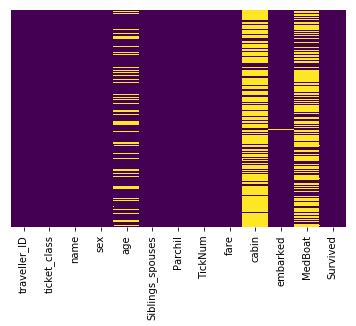

In [18]:
## Checking for Missing values(NaNs) in train set and visualising using SNS

sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [20]:
train.keys().values[::]

array(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin',
       'embarked', 'MedBoat', 'Survived'], dtype=object)

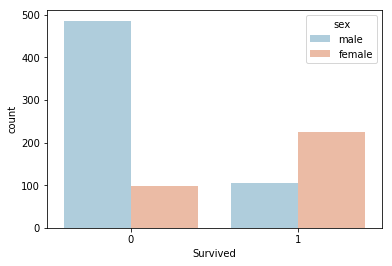

In [21]:
sns.countplot(x=train['Survived'], data=train, hue='sex', palette='RdBu_r')

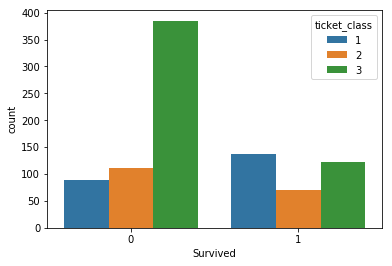

In [22]:
sns.countplot(x=train['Survived'], data=train, hue='ticket_class')

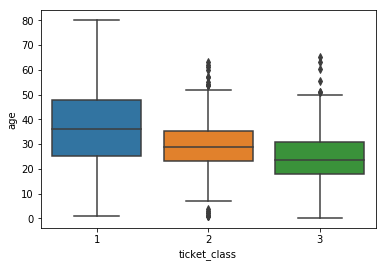

In [27]:
sns.boxplot(train['ticket_class'], train['age'], data = train)

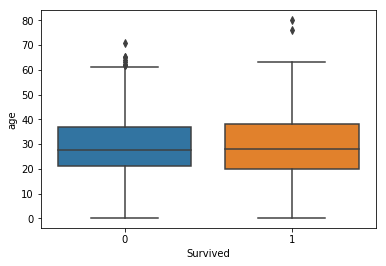

In [28]:
sns.boxplot(train['Survived'], train['age'], data = train)

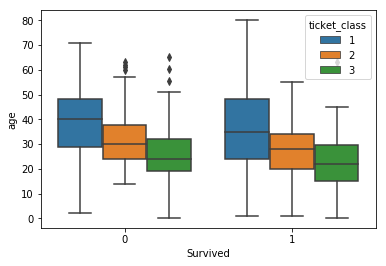

In [29]:
sns.boxplot(train['Survived'], train['age'], data = train, hue='ticket_class')

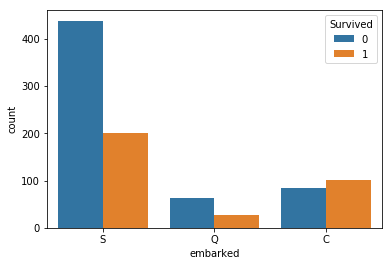

In [30]:
sns.countplot(x='embarked', hue='Survived',data=train);

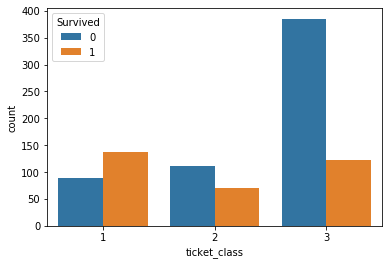

In [45]:
sns.countplot(x=train['ticket_class'], hue = 'Survived',data=train)

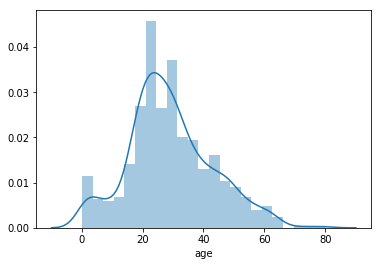

In [31]:
sns.distplot(train['age'].dropna())

In [32]:
#Proportion of those who Survived to those who didn't
train['Survived'].value_counts()

0    585
1    331
Name: Survived, dtype: int64

In [33]:
train['Survived'].value_counts()[0]/len(train['Survived'])*100

63.864628820960704

In [34]:
train['Survived'].value_counts()[1]/len(train['Survived'])*100

36.135371179039296

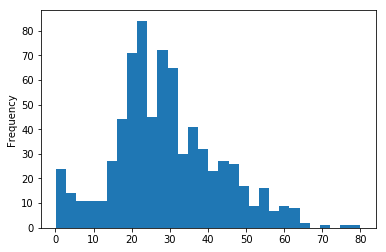

In [35]:
train['age'].plot.hist(bins=30)

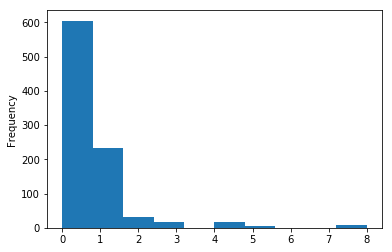

In [36]:
train['Siblings_spouses'].plot.hist()

In [37]:
import seaborn as sns

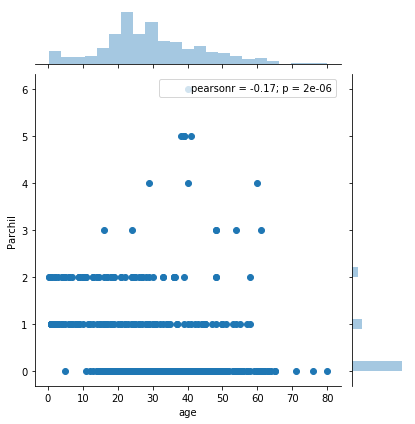

In [38]:
sns.jointplot(x='age',y='Parchil', data=train)

In [39]:
## To observe the correlations between the variables/features that are numerical
cor = train.corr()

In [40]:
cor

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
traveller_ID,1.000000,0.899047,-0.338737,0.070936,0.032266,-0.477824,-0.303913
ticket_class,0.899047,1.000000,-0.384467,0.061178,0.038908,-0.555562,-0.316505
age,-0.338737,-0.384467,1.000000,-0.246946,-0.174866,0.137666,-0.014920
Siblings_spouses,0.070936,0.061178,-0.246946,1.000000,0.367258,0.158024,-0.013675
Parchil,0.032266,0.038908,-0.174866,0.367258,1.000000,0.214890,0.071425
fare,-0.477824,-0.555562,0.137666,0.158024,0.214890,1.000000,0.261934
Survived,-0.303913,-0.316505,-0.014920,-0.013675,0.071425,0.261934,1.000000


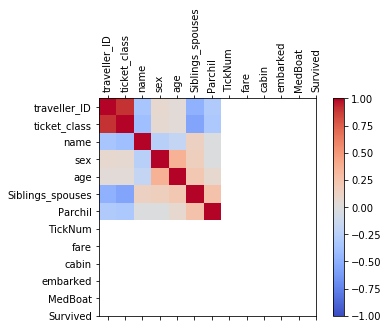

In [41]:
cor = train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

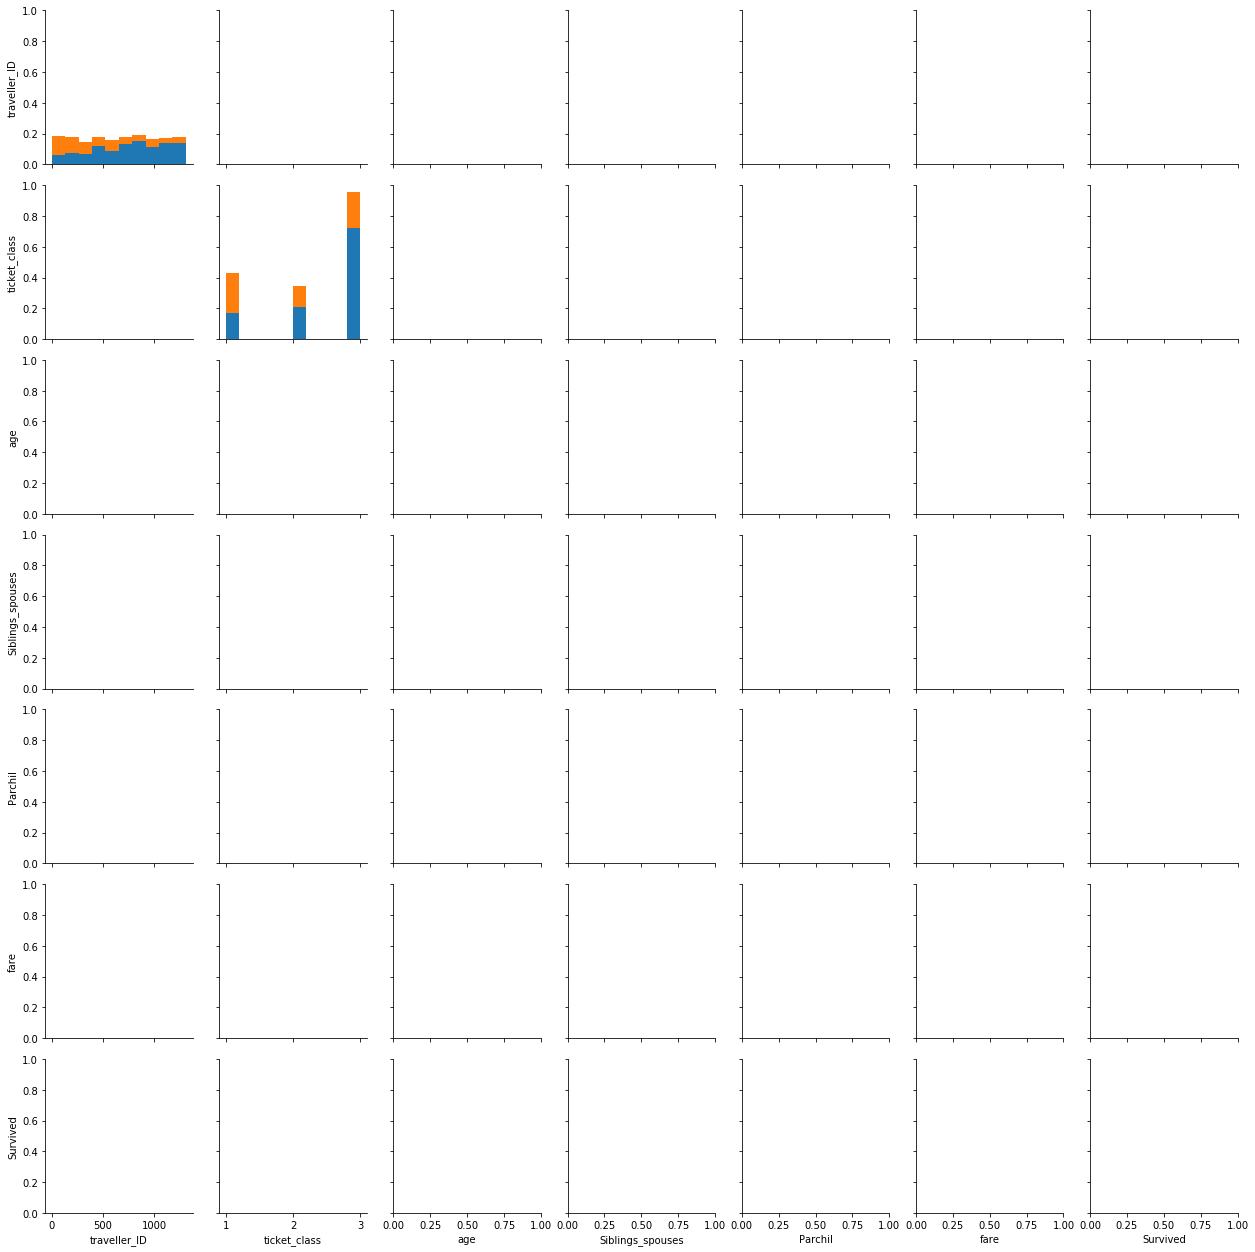

In [42]:
sns.pairplot(train,hue='Survived')

In [45]:
train.isnull().sum().sort_values(ascending=False)

cabin               712
MedBoat             589
age                 187
embarked              1
fare                  1
Survived              0
TickNum               0
Parchil               0
Siblings_spouses      0
sex                   0
name                  0
ticket_class          0
traveller_ID          0
dtype: int64

In [46]:
test.isnull().sum().sort_values(ascending=False)

cabin               302
MedBoat             234
age                  76
embarked              1
fare                  0
TickNum               0
Parchil               0
Siblings_spouses      0
sex                   0
name                  0
ticket_class          0
traveller_ID          0
dtype: int64

In [47]:
###Some Errors in here, check back after first submission and modelling!!!

train['age'].fillna(train['age'].mean(), inplace= True)
train['embarked'].fillna(train['embarked'].mode()[0], inplace= True)
test['embarked'].fillna(test['embarked'].mode()[0], inplace= True)
test['age'].fillna(test['age'].mean(), inplace= True)
train['fare'].fillna(train['fare'].mean(), inplace= True)
test.drop('cabin', axis=1, inplace=True)
train.drop('cabin', axis=1, inplace=True)

In [48]:
#train['MedBoat'].fillna(train['MedBoat'].mode(), inplace= True)
#test['MedBoat'].fillna(test['MedBoat'].mode(), inplace= True)

test.drop('MedBoat', axis=1, inplace=True)
train.drop('MedBoat', axis=1, inplace=True)

In [49]:
print(train.isnull().sum(),test.isnull().sum())

traveller_ID        0
ticket_class        0
name                0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
TickNum             0
fare                0
embarked            0
Survived            0
dtype: int64 traveller_ID        0
ticket_class        0
name                0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
TickNum             0
fare                0
embarked            0
dtype: int64


In [50]:
X= train.drop(['name', 'TickNum', 'embarked','traveller_ID','Survived','fare'], axis=1)
y = train['Survived']

In [51]:
X.head()

,ticket_class,sex,age,Siblings_spouses,Parchil
0,3,male,29.102309,0,0
1,3,male,26.000000,0,0
2,2,female,19.000000,0,0
3,3,female,29.102309,8,2
4,3,female,28.000000,0,0


In [52]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Survived, dtype: int64

In [53]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state=42)

In [54]:
X = pd.get_dummies(X)

In [55]:
X.head()

,ticket_class,age,Siblings_spouses,Parchil,sex_female,sex_male
0,3,29.102309,0,0,0,1
1,3,26.000000,0,0,0,1
2,2,19.000000,0,0,1,0
3,3,29.102309,8,2,1,0
4,3,28.000000,0,0,1,0


In [56]:
SC = StandardScaler()

SC.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
X1 = SC.transform(X)

In [58]:
X1

array([[ 0.82524778,  0.        , -0.49861561, -0.43255344, -0.73979544,
         0.73979544],
       [ 0.82524778, -0.25094932, -0.49861561, -0.43255344, -0.73979544,
         0.73979544],
       [-0.36331663, -0.81718732, -0.49861561, -0.43255344,  1.35172501,
        -1.35172501],
       ...,
       [ 0.82524778, -0.04872147, -0.49861561, -0.43255344, -0.73979544,
         0.73979544],
       [ 0.82524778, -0.25094932, -0.49861561, -0.43255344,  1.35172501,
        -1.35172501],
       [ 0.82524778, -0.08916704, -0.49861561, -0.43255344,  1.35172501,
        -1.35172501]])

In [60]:
X1= pd.DataFrame(X1)

In [63]:
X1.head()

,0,1,2,3,4,5
0,0.825248,0.000000,-0.498616,-0.432553,-0.739795,0.739795
1,0.825248,-0.250949,-0.498616,-0.432553,-0.739795,0.739795
2,-0.363317,-0.817187,-0.498616,-0.432553,1.351725,-1.351725
3,0.825248,0.000000,6.897852,1.805972,1.351725,-1.351725
4,0.825248,-0.089167,-0.498616,-0.432553,1.351725,-1.351725


In [64]:
x2 = test.drop(['name', 'TickNum', 'embarked','traveller_ID','fare'], axis=1)

In [65]:
x2.head(7)

,ticket_class,sex,age,Siblings_spouses,Parchil
0,3.0,male,35.000000,0.0,0.0
1,3.0,male,20.000000,1.0,1.0
2,3.0,male,31.672187,0.0,0.0
3,3.0,male,31.672187,0.0,0.0
4,3.0,male,31.672187,0.0,0.0
5,1.0,male,45.000000,0.0,0.0
6,3.0,male,25.000000,0.0,0.0


In [66]:
x2 = pd.get_dummies(x2)

In [69]:
x2.head()

,ticket_class,age,Siblings_spouses,Parchil,sex_female,sex_male
0,3.0,35.000000,0.0,0.0,0,1
1,3.0,20.000000,1.0,1.0,0,1
2,3.0,31.672187,0.0,0.0,0,1
3,3.0,31.672187,0.0,0.0,0,1
4,3.0,31.672187,0.0,0.0,0,1


In [70]:
x2.corr()

,ticket_class,age,Siblings_spouses,Parchil,sex_female,sex_male
ticket_class,1.000000,-0.412609,0.056327,-0.036535,-0.142665,0.142665
age,-0.412609,1.000000,-0.177432,-0.105820,-0.066366,0.066366
Siblings_spouses,0.056327,-0.177432,1.000000,0.394965,0.059843,-0.059843
Parchil,-0.036535,-0.105820,0.394965,1.000000,0.185099,-0.185099
sex_female,-0.142665,-0.066366,0.059843,0.185099,1.000000,-1.000000
sex_male,0.142665,0.066366,-0.059843,-0.185099,-1.000000,1.000000


In [71]:
x_train,x_test,y_train,y_test = train_test_split(X1,y,test_size = 0.3, random_state = 42)

In [73]:
model = RandomForestClassifier(n_estimators=200) 
model.fit(x_train, y_train) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_pred = model.predict(x_test)

In [75]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
cm = confusion_matrix(y_pred,y_test)

In [77]:
cm

array([[145,  31],
       [ 37,  62]], dtype=int64)

In [78]:
cr = classification_report(y_pred,y_test)

In [79]:
print(f"{cr} \n {f1_score(y_pred,y_test)}")

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       176
          1       0.67      0.63      0.65        99

avg / total       0.75      0.75      0.75       275
 
 0.6458333333333334


In [80]:
## Transforming the real test set

x2 = SC.transform(x2)

In [81]:
#x2 = pd.DataFrame(x2)
x2

array([[ 0.82524778,  0.47707096, -0.49861561, -0.43255344, -0.73979544,
         0.73979544],
       [ 0.82524778, -0.73629618,  0.42594289,  0.68670913, -0.73979544,
         0.73979544],
       [ 0.82524778,  0.20788039, -0.49861561, -0.43255344, -0.73979544,
         0.73979544],
       ...,
       [-0.36331663,  0.96241782, -0.49861561, -0.43255344, -0.73979544,
         0.73979544],
       [ 0.82524778,  0.20788039, -0.49861561, -0.43255344,  1.35172501,
        -1.35172501],
       [-0.36331663, -1.22164304,  0.42594289, -0.43255344,  1.35172501,
        -1.35172501]])

In [82]:
preder = model.predict(x2)

In [83]:
preder

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [84]:
sample_submission = pd.read_csv("sample_submission.csv")

In [86]:
sample_submission.head(6)

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0
5,240,1


In [87]:
submission_file = sample_submission.copy()

In [88]:
submission_file.Survived = preder


In [90]:
submission_file['Survived'].head()

0    0
1    0
2    1
3    1
4    1
Name: Survived, dtype: int64

In [91]:
submission_file['traveller_ID'] = test['traveller_ID']

In [92]:
submission_file.head()

,traveller_ID,Survived
0,1148,0
1,1049,0
2,982,1
3,808,1
4,1195,1


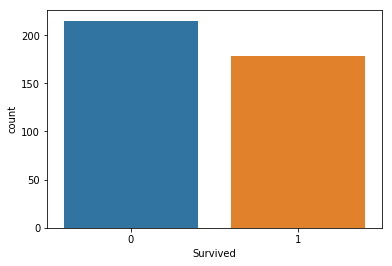

In [93]:
sns.countplot(submission_file.Survived)

In [94]:
submission_file.head()

,traveller_ID,Survived
0,1148,0
1,1049,0
2,982,1
3,808,1
4,1195,1


In [95]:
submission_file.to_csv('sixthsub.csv', index=False)